<a href="https://colab.research.google.com/github/hanbuck30/myrepo/blob/main/svm_regre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset 준비

In [3]:
df=pd.read_csv("Data.csv",encoding='CP949')
df

,PSS(지각된 스트레스 척도),코르티솔,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
0,16,0.088,83,97,31,1.260000e-12,7.450000e-13,4.130000e-14,5.580000e-13,2.570000e-13,...,-4.35,-3.35,-3.40,-4.35,-3.45,-3.40,-4.25,-4.35,-3.40,-3.45
1,18,0.171,72,98,37,2.100000e-13,3.350000e-13,4.840000e-14,2.730000e-14,2.280000e-15,...,0.40,4.15,-3.80,-0.30,3.20,0.15,3.60,0.50,3.20,2.90
2,26,0.122,92,97,24,2.230000e-40,9.940000e-41,7.800000e-42,1.470000e-41,5.450000e-41,...,-2.95,-3.15,-3.00,-2.85,-2.80,-3.10,-2.85,-2.85,-2.65,-2.75
3,17,0.124,76,97,45,1.010000e-13,4.240000e-14,5.350000e-13,3.600000e-13,5.650000e-14,...,0.90,2.00,0.95,-0.25,1.90,-0.20,1.70,1.80,-0.15,-0.20
4,15,0.128,75,48,38,9.830000e-16,9.980000e-15,3.030000e-13,6.670000e-14,7.040000e-15,...,0.00,-0.25,-0.20,0.00,2.85,0.00,-0.25,-0.15,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,27,0.112,85,98,32,2.770000e-14,8.590000e-14,1.760000e-13,5.310000e-15,9.760000e-13,...,7.90,3.90,-0.05,4.00,0.00,3.60,3.65,4.45,3.80,3.70
176,23,0.134,92,98,14,4.570000e-14,1.400000e-13,1.630000e-14,4.280000e-14,1.480000e-13,...,0.45,-2.75,-3.35,-3.15,1.10,0.55,-0.10,0.65,0.60,1.20
177,10,0.151,68,98,41,5.440000e-42,4.330000e-42,4.980000e-40,5.050000e-40,4.560000e-41,...,-0.60,-0.60,-2.85,-0.60,-2.85,-3.45,-3.60,-0.60,-2.80,-2.80
178,10,0.107,83,98,31,6.060000e-13,2.660000e-13,4.220000e-13,1.460000e-14,1.890000e-14,...,-4.10,-2.10,2.35,-2.25,0.40,2.40,-0.50,-0.45,2.50,2.35


In [4]:
df.describe()

,PSS(지각된 스트레스 척도),코르티솔,심박수,산소포화도,심박변이,0_Fp1_δ (0),0_Fp2_δ (1),0_F3_δ (2),0_F4_δ (3),0_F7_δ (4),...,3_T7_Alpha Peak_w (712),3_T8_Alpha Peak_w (713),3_Cz_Alpha Peak_w (714),3_P3_Alpha Peak_w (715),3_P4_Alpha Peak_w (716),3_P7_Alpha Peak_w (717),3_P8_Alpha Peak_w (718),3_Pz_Alpha Peak_w (719),3_O1_Alpha Peak_w (720),3_O2_Alpha Peak_w (721)
count,180.000000,180.000000,180.000000,180.000000,180.000000,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,18.494444,0.137839,74.672222,97.600000,34.411111,5.757650e-12,3.723047e-12,5.163789e-12,3.793818e-12,2.020830e-12,...,-0.680556,-0.563611,-0.768333,-0.865833,-0.527500,-0.759167,-0.670556,-0.924444,-0.629722,-0.570556
std,5.051132,0.086779,11.489043,3.736577,8.436943,5.569867e-11,2.031909e-11,5.131491e-11,2.667421e-11,9.716337e-12,...,2.602676,2.621947,2.509813,2.190772,2.320399,2.333958,2.373720,2.382416,2.410305,2.467712
min,8.000000,0.020000,39.000000,48.000000,14.000000,2.940000e-43,3.050000e-43,2.950000e-43,3.040000e-43,2.970000e-43,...,-7.150000,-5.800000,-5.900000,-5.800000,-5.550000,-6.100000,-5.600000,-5.850000,-7.250000,-5.600000
25%,15.000000,0.083750,67.000000,98.000000,30.000000,3.292500e-16,2.142500e-15,3.987500e-16,2.725000e-15,6.190000e-16,...,-2.762500,-2.812500,-2.912500,-2.900000,-2.350000,-2.887500,-2.700000,-2.937500,-2.687500,-2.675000
50%,19.000000,0.116500,74.000000,98.000000,34.000000,4.795000e-14,1.510000e-13,7.345000e-14,1.185000e-13,4.570000e-14,...,-0.350000,-0.125000,-0.275000,-0.250000,-0.150000,-0.150000,-0.175000,-0.425000,-0.125000,-0.100000
75%,21.250000,0.171000,83.000000,98.000000,38.000000,4.610000e-13,5.922500e-13,5.687500e-13,9.127500e-13,4.515000e-13,...,0.400000,0.712500,0.562500,0.450000,0.650000,0.600000,0.600000,0.400000,0.612500,0.825000
max,31.000000,0.538000,108.000000,99.000000,81.000000,7.420000e-10,2.160000e-10,6.850000e-10,3.500000e-10,1.070000e-10,...,7.900000,7.400000,6.700000,5.300000,6.650000,5.700000,6.650000,6.650000,7.550000,6.650000


In [5]:
df.columns

Index(['PSS(지각된 스트레스 척도)', '코르티솔', '심박수', '산소포화도', '심박변이', '0_Fp1_δ (0)',
       '0_Fp2_δ (1)', '0_F3_δ (2)', '0_F4_δ (3)', '0_F7_δ (4)',
       ...
       '3_T7_Alpha Peak_w (712)', '3_T8_Alpha Peak_w (713)',
       '3_Cz_Alpha Peak_w (714)', '3_P3_Alpha Peak_w (715)',
       '3_P4_Alpha Peak_w (716)', '3_P7_Alpha Peak_w (717)',
       '3_P8_Alpha Peak_w (718)', '3_Pz_Alpha Peak_w (719)',
       '3_O1_Alpha Peak_w (720)', '3_O2_Alpha Peak_w (721)'],
      dtype='object', length=3805)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 3805 entries, PSS(지각된 스트레스 척도) to 3_O2_Alpha Peak_w (721)
dtypes: float64(3657), int64(148)
memory usage: 5.2 MB


In [57]:
y = df["PSS(지각된 스트레스 척도)"]
z =df[['코르티솔']]
z = (z -z.min())/(z.max() - z.min()) # 코르티솔 값
y = (y -y.min())/(y.max() - y.min()) #normalization 된 pss값 (0 to 1)
x_train=df.drop(columns=['PSS(지각된 스트레스 척도)','코르티솔']) #x_train = Data로 사용될 수 있는 value
x_test = x_train.sample()

In [36]:
y

0      0.347826
1      0.434783
2      0.782609
3      0.391304
4      0.304348
         ...   
175    0.826087
176    0.652174
177    0.086957
178    0.086957
179    0.173913
Name: PSS(지각된 스트레스 척도), Length: 180, dtype: float64

# svm_Regression

In [90]:
svm_regression_y =svm.SVR(kernel="poly", degree=3, C=1, epsilon=0.01,gamma='auto')
svm_regression_z =svm.SVR(kernel="poly", degree=3, C=1, epsilon=0.01,gamma='auto')
svm_regression_y.fit(x_train, y)
svm_regression_z.fit(x_train, z)
y_pred_svm = svm_regression_y.predict(x_train)
z_pred_svm = svm_regression_z.predict(x_train)
def plot_svm_regression(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    #plt.scatter(y,y_pred ,alpha=0.5)
    plt.plot(X, y_pred, "k-", linewidth=2)
    #plt.plot(X, y_pred + svm_reg.epsilon, "k--")
    #plt.plot(X, y_pred - svm_reg.epsilon, "k--")
    
    plt.ylabel('pred_value',fontsize=18)
    plt.xlabel("Data", fontsize=18)
    plt.legend()

    

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
y_pred_svm

array([0.33766897, 0.44492416, 0.77251761, 0.40136168, 0.31428294,
       0.90294774, 0.5553216 , 0.33780715, 0.48824275, 0.4245997 ,
       0.31437082, 0.46817807, 0.81610925, 0.77263612, 0.09687385,
       0.0535496 , 0.4012487 , 0.68566913, 0.57533343, 0.61880141,
       0.42487585, 0.01014117, 0.64211468, 0.64211571, 0.64207065,
       0.0970582 , 0.05348202, 0.18398909, 0.46818   , 0.5115531 ,
       0.51165654, 0.22727688, 0.38118424, 0.35788303, 0.74925211,
       0.77245537, 0.51160181, 0.44472556, 0.44484649, 0.42471443,
       0.44518729, 0.27075617, 0.27097703, 0.09699778, 0.09697209,
       0.14043931, 0.09679768, 0.29439313, 0.22739129, 0.59860534,
       0.59879094, 0.44495659, 0.59862649, 0.29421946, 0.31437503,
       0.55528523, 0.40131397, 0.57523153, 0.51168034, 0.59862923,
       0.40131899, 0.3811924 , 0.40130718, 0.46813002, 0.5316285 ,
       0.51180239, 0.51155382, 0.53187771, 0.8160396 , 0.85971593,
       0.59865562, 0.61873571, 0.35789707, 0.51170706, 0.53178

In [13]:
z_pred_svm

array([ 0.23102237,  0.19142235,  0.29679272,  0.10097116,  0.308404  ,
        0.21464431,  0.25461034,  0.228418  ,  0.71267072,  0.39158923,
        0.33156636,  0.2281516 ,  0.28337611,  0.11761375,  0.10384771,
        0.25447247,  0.1444471 ,  0.40524985,  0.19150082,  0.79571405,
        0.26419556,  0.32683362,  0.25445682,  0.23317314,  0.43350678,
        0.62894383,  0.2621122 ,  0.20738492,  0.20237493,  0.33446084,
        0.21281856,  0.16936764,  0.0527238 ,  0.20216649,  0.20521943,
        0.26257566,  0.23896493,  0.30002287,  0.751158  ,  0.17067753,
        0.04319572,  0.14913139,  0.10556851,  0.18933263,  0.29489475,
        0.16809441,  0.13726038,  0.19637068,  0.24278161,  0.27368489,
        0.27652921,  0.08371976,  0.19081828,  0.24555292,  0.19563083,
        0.27357405,  0.25063451,  0.14558785,  0.2004192 ,  0.21868069,
        0.26862606,  0.2109944 ,  0.14250954,  0.26986316, -0.10001354,
        0.20619474,  0.32822135,  0.09615968,  0.40338878,  0.24

## emsemble Regression

In [104]:
gbrt_y = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-2, random_state=42)
gbrt_z = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-2, random_state=42)
gbrt_y.fit(x_train, y.values.ravel())
gbrt_z.fit(x_train, z.values.ravel())
mse_y=mean_squared_error(y,gbrt_y.predict(x_train))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_y))

The mean squared error (MSE) on test set: 0.0001


In [15]:
print('y_pred_ensemble :', gbrt_y.predict(x_train)) #ensemble model

y_pred_ensemble : [0.44595451 0.45451685 0.48734923 0.45009398 0.44043521 0.49976764
 0.46665187 0.4466474  0.45837293 0.45451685 0.44181504 0.45837293
 0.4914887  0.48734923 0.42111768 0.41697821 0.45451685 0.47907029
 0.46665187 0.47079134 0.45423345 0.41283874 0.47493081 0.47493081
 0.47493081 0.42111768 0.41697821 0.42939662 0.45451685 0.4625124
 0.4625124  0.4335361  0.45216372 0.44595451 0.48320976 0.48734923
 0.4625124  0.45423345 0.45423345 0.45451685 0.45423345 0.43767557
 0.44043521 0.42111768 0.42111768 0.42525715 0.42111768 0.44181504
 0.4335361  0.47079134 0.46805419 0.45423345 0.47079134 0.44181504
 0.44043521 0.46766467 0.45009398 0.4670222  0.4625124  0.47079134
 0.45009398 0.45009398 0.45058054 0.45837293 0.4625124  0.4625124
 0.46080578 0.4625124  0.4914887  0.49562817 0.47079134 0.47079134
 0.44595451 0.4625124  0.46206442 0.4625124  0.42111768 0.4335361
 0.42525715 0.45451685 0.46665187 0.49976764 0.49976764 0.45423345
 0.4625124  0.46080578 0.43767557 0.46665187 0.

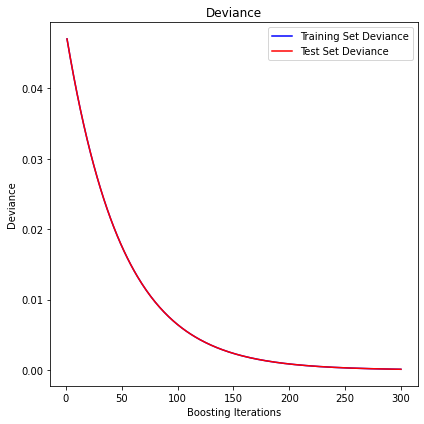

In [108]:
test_score = np.zeros((300,), dtype=np.float64)
for i, y_pred in enumerate(gbrt_y.staged_predict(x_train)):
    test_score[i] = mean_squared_error(y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(300) + 1,
    gbrt_y.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(300) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [119]:

import eli5
from eli5.sklearn import PermutationImportance

In [124]:
columns = x_train.columns
coefficients = gbrt_y.feature_importances_.reshape(x_train.columns.shape[0], 1)
pd.concat([pd.DataFrame(columns, columns=['변수명']), pd.DataFrame(coefficients, columns=['특성 중요도'])], axis=1).sort_values(by='특성 중요도', ascending=False)

,변수명,특성 중요도
2465,2_Cz_θ/Low β (410),0.120223
1155,1_P3_θ (126),0.084756
2389,2_Cz_Low β (334),0.073908
1159,1_Pz_θ (130),0.064035
327,0_Fp2_Low β (324),0.057601
...,...,...
1236,1_O1_Slow α (207),0.000000
2092,2_O2_θ (37),0.000000
2093,2_Fp1_α (38),0.000000
2094,2_Fp2_α (39),0.000000


In [157]:
perm = PermutationImportance(gbrt_y, random_state=42).fit(x_train, y)
eli5.show_weights(perm, feature_names=x_train.columns.tolist())

Weight,Feature
0.8613 ± 0.2483,2_Cz_θ/Low β (410)
0.6049 ± 0.2137,1_P3_θ (126)
0.3621 ± 0.1439,2_Cz_Low β (334)
0.2143 ± 0.0941,1_Pz_θ (130)
0.1487 ± 0.0976,1_P7_Fast α (318)
0.1339 ± 0.0213,2_C3_α/High β (862)
0.1272 ± 0.0355,3_Cz_γ (182)
0.1222 ± 0.0537,0_Fp2_Low β (324)
0.1076 ± 0.0250,2_C4_α/High β (863)
0.1012 ± 0.0571,3_O2_Low β (341)


svm visualize

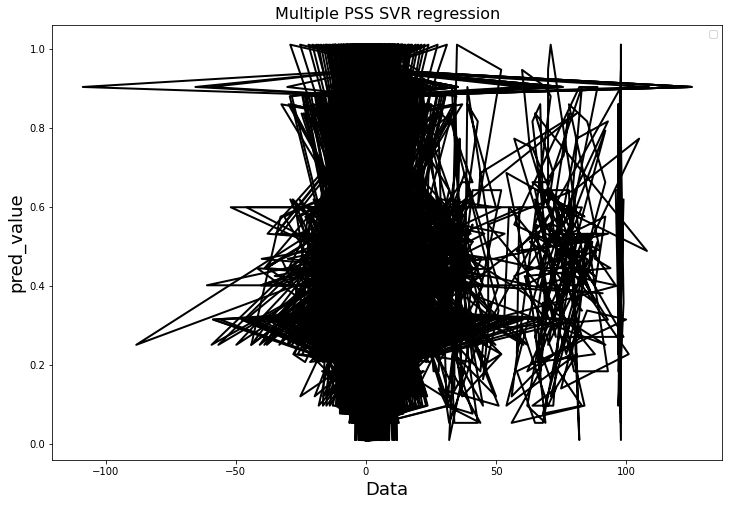

In [94]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plot_svm_regression(svm_regression_y, x_train, y)
plt.title("Multiple PSS SVR regression",fontsize=16)
plt.show()

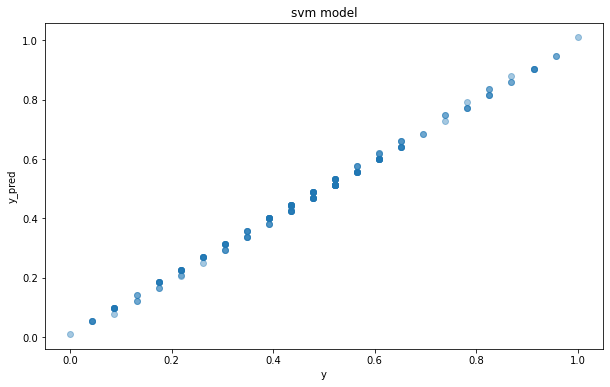

In [93]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(y, y_pred_svm,alpha=0.4)
plt.title("svm model")
plt.xlabel("y")
plt.ylabel("y_pred")
plt.show()

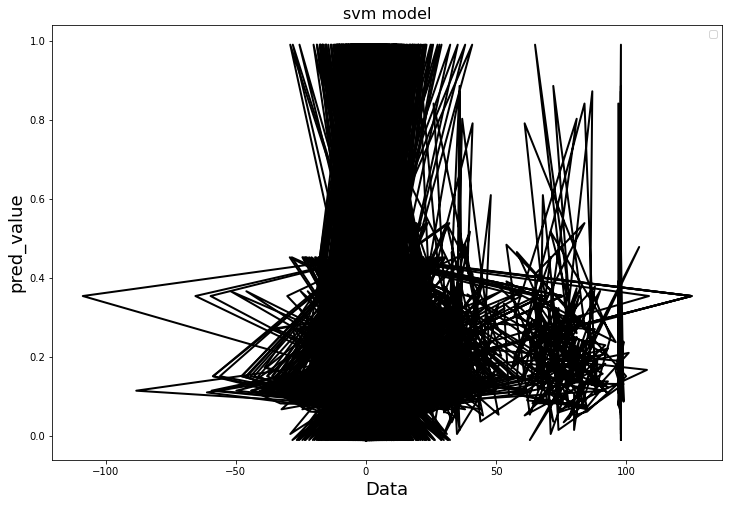

In [95]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plot_svm_regression(svm_regression_z, x_train, z)
plt.title("svm model",fontsize=16)
plt.show()

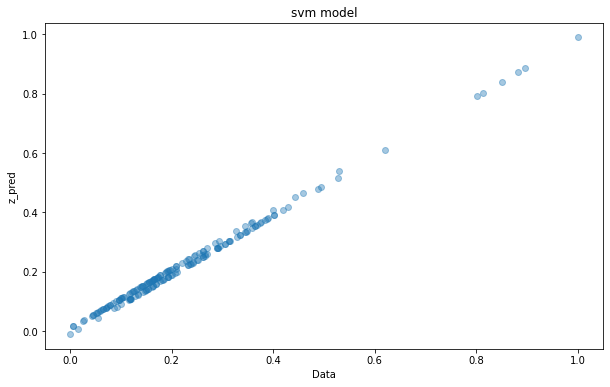

In [98]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(z, z_pred_svm,alpha=0.4)
plt.title("svm model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

ensemble visulalize

In [75]:
y_pred_ensemble = gbrt_y.predict(x_train)
z_pred_ensemble = gbrt_z.predict(x_train)

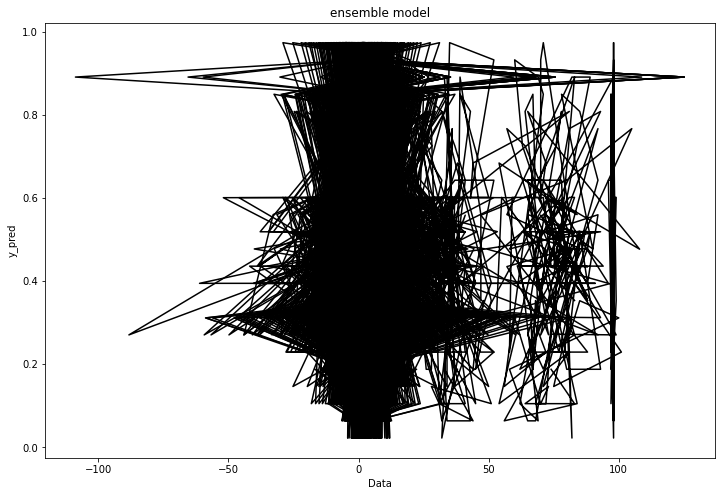

In [82]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.plot(x_train, y_pred_ensemble,"k-")
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("y_pred")
plt.show()

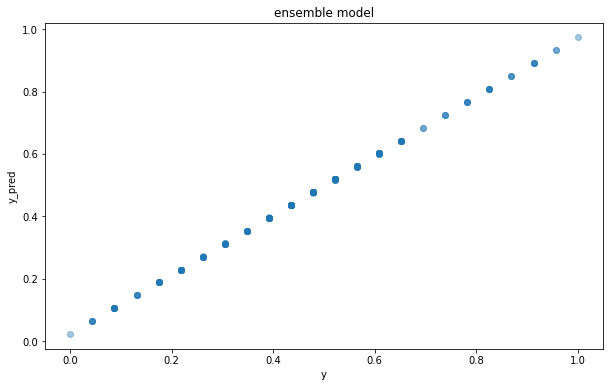

In [77]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(y, y_pred_ensemble,alpha=0.4)
plt.title("ensemble model")
plt.xlabel("y")
plt.ylabel("y_pred")
plt.show()

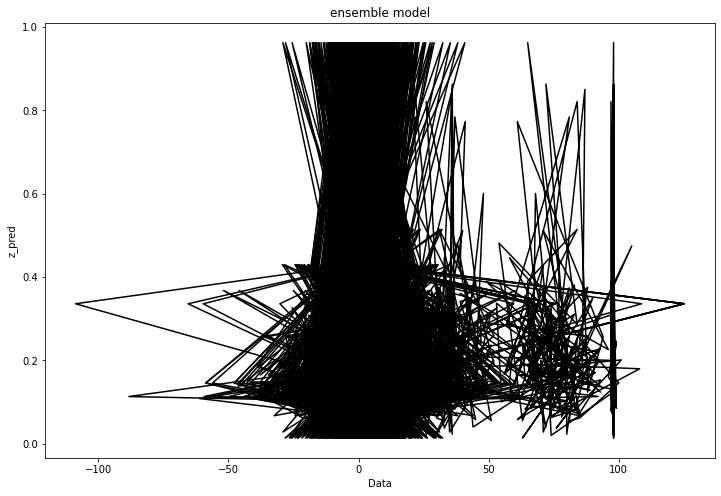

In [83]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.plot(x_train, z_pred_ensemble,"k-")
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

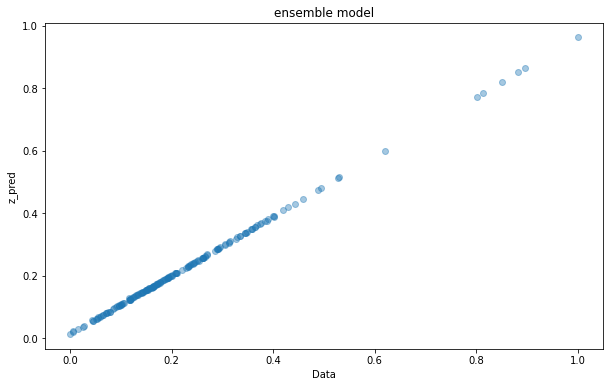

In [84]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(z, z_pred_ensemble,alpha=0.4)
plt.title("ensemble model")
plt.xlabel("Data")
plt.ylabel("z_pred")
plt.show()

# column별 관계

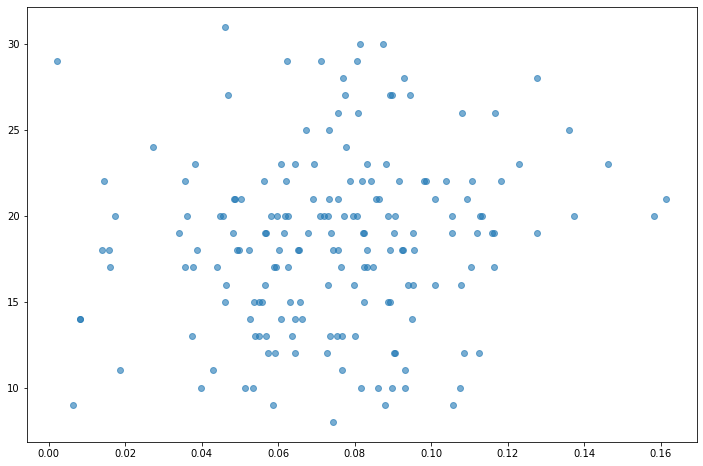

In [133]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["2_Cz_Low β (334)"]],df[['PSS(지각된 스트레스 척도)']],alpha=0.6)
plt.show()

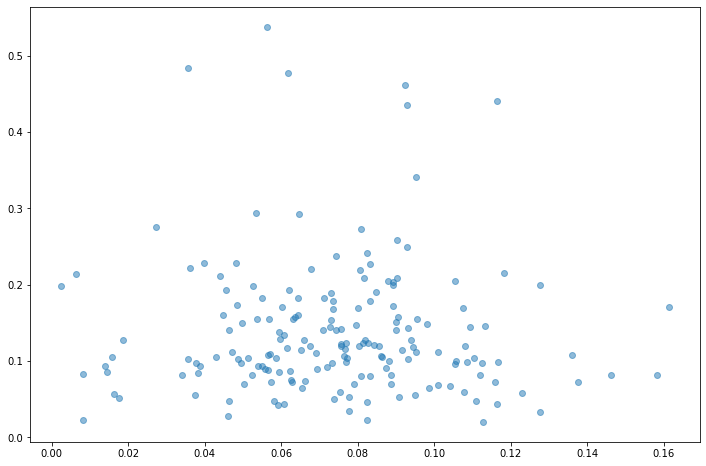

In [132]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[["2_Cz_Low β (334)"]],df[['코르티솔']],alpha=0.5)
plt.show()

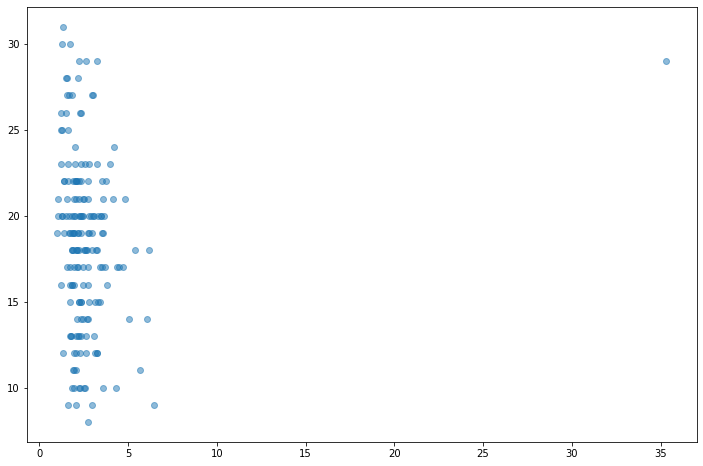

In [128]:
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(df[['2_Cz_θ/Low β (410)']],df[["PSS(지각된 스트레스 척도)"]],alpha=0.5)
plt.show()

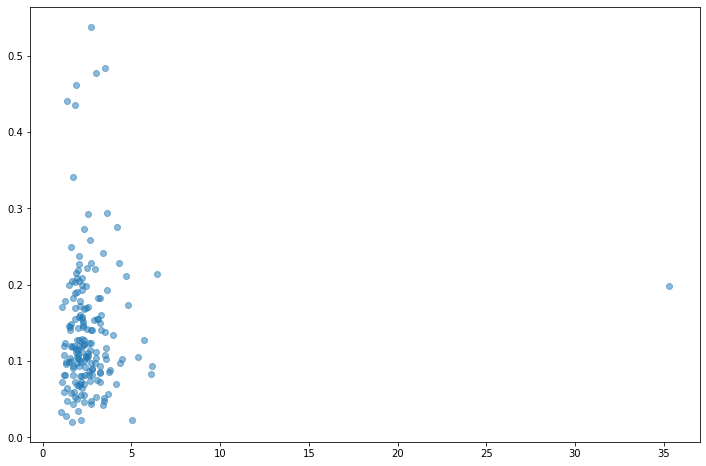

In [129]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.scatter(df[['2_Cz_θ/Low β (410)']],df[["코르티솔"]],alpha=0.5)
plt.show()

In [91]:
svm_regression_y.score(x_train, y) #svm preceision score

0.9979115705286146

In [92]:
svm_regression_z.score(x_train, z) #svm precision score

0.9964574155119549

In [80]:
gbrt_y.score(x_train,y) #ensemble score

0.9975625557304376

In [81]:
gbrt_z.score(x_train,z)  #ensemble score

0.9969003420259187

# Test about 2_Cz_θ/Low β (410)

In [171]:
x_train_2 =df[['2_Cz_θ/Low β (410)']]

In [172]:
gbrt_2 = GradientBoostingRegressor(max_depth=10, n_estimators=300, learning_rate=1e-2, random_state=42)
gbrt_2.fit(x_train_2,y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=300,
                          random_state=42)

In [173]:
mse_2=mean_squared_error(y,gbrt_2.predict(x_train_2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_2))

The mean squared error (MSE) on test set: 0.0070


In [174]:
print('y_pred_ensemble :', gbrt_2.predict(x_train_2)) #ensemble model

y_pred_ensemble : [0.38624148 0.43117991 0.55436328 0.41235968 0.43359847 0.76912304
 0.55868773 0.39247469 0.47726912 0.45762528 0.34503591 0.45014516
 0.80294359 0.76223428 0.32702542 0.07017603 0.38562233 0.64630165
 0.55868773 0.53755971 0.43525417 0.25743991 0.47583427 0.52433297
 0.58308155 0.23564713 0.21908021 0.27194238 0.47282294 0.51797843
 0.51797843 0.33703782 0.43224439 0.36454288 0.72024247 0.76223428
 0.43359847 0.43395761 0.43840823 0.43093788 0.43537332 0.28596191
 0.29099808 0.20792132 0.23415058 0.24192225 0.19407852 0.42814945
 0.31640962 0.4892911  0.50388207 0.42880218 0.5311537  0.34716331
 0.3764665  0.45855656 0.39919015 0.48833005 0.51797843 0.55641714
 0.39919015 0.40838041 0.40575507 0.4618956  0.51797843 0.4536451
 0.50837568 0.47416589 0.69284914 0.84365289 0.5382969  0.59939704
 0.41312597 0.48724095 0.47425419 0.43359847 0.14674198 0.31441698
 0.17390336 0.44741281 0.54121407 0.6635559  0.73578281 0.44786758
 0.55341458 0.46170868 0.34583264 0.50289275 

In [175]:
y_pred_2=gbrt_2.predict(x_train_2)

In [176]:
gbrt_2.score(x_train_2,y)

0.8548493611385349

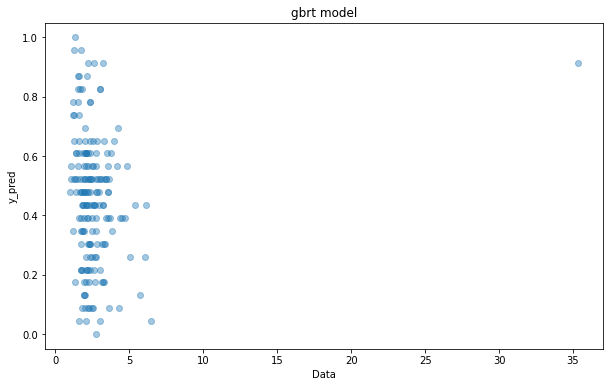

In [177]:
fig = plt.figure()
fig.set_size_inches(10,6)
plt.scatter(x_train_2, y,alpha=0.4)
plt.title("gbrt model")
plt.xlabel("Data")
plt.ylabel("y_pred")
plt.show()

In [180]:
def plot_predictions(regressors, X, y, label=None, style="r-", data_style="b.", data_label=None):
 
    y_pred = sum(regressor.predict(X) for regressor in regressors)
    plt.plot(X, y, data_style, label=data_label)
    plt.plot(X, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)

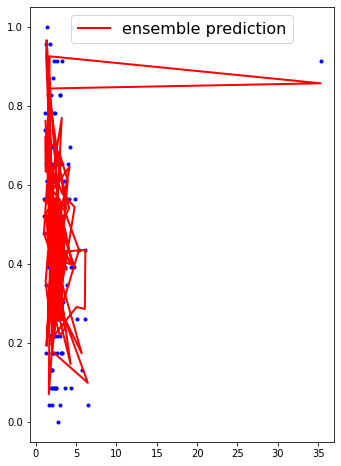

In [181]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plot_predictions([gbrt_2],x_train_2,y,label='ensemble prediction')